<a href="https://colab.research.google.com/github/pedsanches/C-digos_GA/blob/main/NSGAII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import e inicializações

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.utils import shuffle
import numpy as np
import random
import matplotlib.cm as cm
from numpy import loadtxt
import pandas as pd
from math import sin,sqrt,pi,cos
import re
import time
import networkx as nx
#import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import imageio
from matplotlib.animation import FuncAnimation
from IPython import display
import os
import operator
import math 
from itertools import repeat


In [ ]:
def inicial():
  x = [
[ 8.51389406e-01, -7.23566417e-01],
[ 3.01462124e-05,  1.08023944e+00],
[ 4.45608330e-01, -4.74051121e-02],
[ 8.08212515e-01, -5.39493958e-02],
[ 4.12117981e-01,  2.66389968e-01],
[ 2.61351443e-01,  2.92122799e-01],
[ 1.88267335e-01,  7.24329158e-01],
[ 4.27200857e-01,  8.99173570e-02],
[ 8.21765850e-01, -3.72304469e-01],
[ 8.12048166e-01, -1.19660131e-01],
[ 2.31420167e-01,  4.22194727e-01],
[ 3.23607093e-02,  8.94605037e-01],
[ 9.11930970e-02,  7.54687189e-01],
[ 8.31755960e-01, -5.59038432e-01],
[ 2.02664430e-02,  9.58962780e-01],
[ 2.05785586e-01,  6.02087148e-01],
[ 2.12953650e-01,  5.29928387e-01],
[ 6.97982471e-02,  7.71314624e-01],
[ 8.26500943e-01, -4.67218402e-01],
[ 8.46265914e-01, -6.91044392e-01],
[ 8.51306714e-01, -7.65335554e-01],
[ 4.14190817e-06,  1.01390778e+00],
[ 4.53293831e-01, -1.16432916e-01],
[ 8.09315989e-01, -1.25008239e-01],
[ 8.15117180e-02,  6.91358267e-01],
[ 4.11355093e-01,  2.46306870e-01],
[ 2.32283258e-02,  8.59464758e-01],
[ 2.00303529e-01,  5.81551520e-01],
[ 2.56249437e-01,  2.54430174e-01],
[ 4.32978288e-01, -1.33226599e-02],
[ 8.31395290e-01, -5.96601052e-01],
[ 8.24366530e-01, -4.69646054e-01],
[ 2.23678972e-01,  3.87446479e-01],
[ 1.84825179e-01,  6.68145090e-01],
[ 4.20680852e-01,  1.06925624e-01],
[ 8.18956560e-01, -3.51267396e-01],
[ 5.96277398e-03,  9.54115048e-01],
[ 2.51140658e-01,  2.60446714e-01],
[ 8.41474392e-01, -7.06881428e-01],
[ 2.24750814e-01,  3.79342567e-01],
[ 8.49199286e-01, -3.88611651e-01],
[ 9.10759361e-05,  1.67374441e+00],
[ 4.51416823e-01,  3.66527342e-01],
[ 8.08354645e-01,  3.25377822e-01],
[ 4.07014041e-01,  7.24945605e-01],
[ 2.57409035e-01,  7.59115273e-01],
[ 2.15578638e-02,  1.47886841e+00],
[ 6.25198676e-02,  1.27225744e+00],
[ 1.67831108e-01,  1.26435806e+00],
[ 4.19798312e-01,  5.82254622e-01],
[ 5.09853206e-02,  1.35238276e+00],
[ 2.51474191e-01,  7.95823741e-01],
[ 2.11075635e-01,  9.40343521e-01],
[ 8.23790692e-01, -4.10381929e-02],
[ 7.44082894e-04,  1.63113058e+00],
[ 8.41621767e-01, -3.07229439e-01],
[ 8.14555543e-01,  1.27408823e-01],
[ 1.77582271e-01,  1.20156321e+00],
[ 1.92006361e-01,  1.12056483e+00],
[ 2.01135819e-01,  1.06080090e+00]
]
  x= shuffle(x,random_state=0)
  return x

#Gera Indv MOP4


In [ ]:
def gera_ind_mop4(maximo):
  return [[(random.random()-0.5)*maximo,(random.random()-0.5)*maximo,(random.random()-0.5)*maximo],np.inf,np.inf]
#print(gera_ind_mop4())

#Gera Indv ZDT3

In [ ]:
def gera_ind_zdt3():
  indv = []
  for i in range(30):
    indv.append(random.random())
  return [indv]
#print(gera_ind_zdt3())

#Gera Indv ZDT4

In [ ]:
def gera_ind_zdt4():
  indv = []
  for i in range(10):
    if(i==0):
      indv.append(random.random())
    else:
      indv.append((random.random()-0.5)*10)
  return [indv]
#print(gera_ind_zdt3())

#Calcula F de MOP4

In [ ]:
def f_mop4(indv):
  if(len(indv) >= 3):
    indv[1] = sum(-10 * math.exp(-0.2 * math.sqrt(x * x + y * y)) for x, y in zip(indv[0][:-1], indv[0][1:]))
    indv[2] = sum(abs(x)**0.8 + 5 * math.sin(x * x * x) for x in indv[0])
  else:
    indv.append(sum(-10 * math.exp(-0.2 * math.sqrt(x * x + y * y)) for x, y in zip(indv[0][:-1], indv[0][1:])))
    indv.append(sum(abs(x)**0.8 + 5 * math.sin(x * x * x) for x in indv[0]))
  return indv


#Calcula ZDT3

In [ ]:

def f_ZDT3(individual):
    #print(individual)
    g  = 1.0 + 9.0*sum(individual[1:])/(len(individual)-1)
    f1 = individual[0]
    f2 = g * (1 - sqrt(f1/g) - f1/g * sin(10*pi*f1))

    #print(f1,f2)

    return f1, f2

In [ ]:
def separa_ZDT3(indv):
  if (len(indv) >= 3):
    #print(i[0])
    aux = f_ZDT3(indv[0].copy())
    indv[1] = aux[0]
    indv[2] = aux[1] 
  else:
    aux = f_ZDT3(indv[0].copy())
    indv += [aux[0]] + [aux[1]]
  return indv


#Calcula ZDT4

In [ ]:
def separa_ZDT4(indv):
  if (len(indv) >= 3):
    #print(i[0])
    aux = zdt4(indv[0].copy())
    indv[1] = aux[0]
    indv[2] = aux[1] 
  else:
    aux = zdt4(indv[0].copy())
    indv += [aux[0]] + [aux[1]]
  return indv

In [ ]:
def zdt4(individual):
    g  = 1 + 10*(len(individual)-1) + sum(xi**2 - 10*cos(4*pi*xi) for xi in individual[1:])
    f1 = individual[0]
    f2 = g * (1 - sqrt(f1/g))
    return f1, f2

#Separa Ranks

In [ ]:
def non_dominate(lista = []):
  for i in lista:
    if(len(i) < 4):
      i.append(0)
  #print(lista_retorno)
  for i in lista:
    for j in lista:
      if(i[1] >= j[1] and i[2] >= j[2] and  i != j):
        i[3] += 1
  return(lista.copy())


#Calc Dist

In [ ]:
qntd_obj = 2
def arruma_dist(list_rank):

  list_rank = sorted(list_rank, key=lambda x: (x[3]))

  #print(len(list_rank),*list_rank,sep = '\n')
  
  aux = list_rank.copy()
  lista_nova = []
  lista_total = []

  while(list_rank):
    if(len(list_rank) == 1):
      lista_nova.append(list_rank[0])
      del(list_rank[0])
      lista_total += calc_dist(lista_nova.copy()).copy()
      lista_nova = []
      
    else:
      if(list_rank[0][len(list_rank[0])-1] == list_rank[1][len(list_rank[1])-1] ):
        lista_nova.append(list_rank[0])
        del(list_rank[0])

      else:
        lista_nova.append(list_rank[0])
        del(list_rank[0])
        #print(lista_nova)
        lista_total = lista_total + calc_dist(lista_nova.copy()).copy()
        #print(lista_nova)
        lista_nova = []
  
  return lista_total.copy()
   


In [ ]:
def calc_dist(lista_arrumada):

  aux = lista_arrumada.copy()

  for i in lista_arrumada:
    if(len(i) <= 4):
      i.append(0)
    else:
      i[4] = 0

  #print(lista_arrumada)
  #print(len(lista_arrumada),*lista_arrumada,sep = '\n')

#PLOT DO GRÁFICO APENAS
  #if(lista_arrumada[0][2] == 0):
    #plt.xlim(-0.25,1)
    #plt.ylim(-1,2)
    #x = []
    #y = []
    #for i in (lista_arrumada):
      #x.append(i[0])
      #y.append(i[1])
    #plt.plot(x,y)
    #plt.scatter(x,y)
#FIM
  #lista_arrumada = sorted(lista_arrumada, key=lambda x: (x[2], x[0]))
  #print("Obj 1:",lista_arrumada)
  #lista_arrumada = sorted(lista_arrumada, key=lambda x: (x[2], x[1]))
  #print("Obj 2:",lista_arrumada)
  
  for i in range(qntd_obj):
    lista_arrumada = aux.copy()
    lista_arrumada = sorted(lista_arrumada, key=lambda x: (x[len(x)-2], x[i-4]))
    
    #print(lista_arrumada)

    #print(len(lista_arrumada),*lista_arrumada,sep = '\n')

    if(len(lista_arrumada)==1):
      lista_arrumada[0][len(lista_arrumada[0])-1] +=  np.inf

    else:
      #print(lista_arrumada[len(lista_arrumada)-1])
      lista_arrumada[len(lista_arrumada)-1][len(lista_arrumada[len(lista_arrumada)-1]) -1] += np.inf
      lista_arrumada[0][len(lista_arrumada[0])-1] += np.inf

    if(len(lista_arrumada)>2):
      for i in range(1,len(lista_arrumada)-1):
        #print(i,abs(lista_arrumada[i-1][0]-lista_arrumada[i+1][0])*abs(lista_arrumada[i-1][1]-lista_arrumada[i+1][1]))
        #print(lista_arrumada[i-1] )
        lista_arrumada[i][len(lista_arrumada[i])-1] += abs(lista_arrumada[i-1][len(lista_arrumada[i-1]) - 4] - lista_arrumada[i+1][len(lista_arrumada[i+1])-4]) + abs(lista_arrumada[i-1][len(lista_arrumada[i-1])-3]-lista_arrumada[i+1][len(lista_arrumada[i+1])-3])
  #print(lista_arrumada)

  return lista_arrumada.copy()

#Torneio

In [ ]:
def torneio(pop  = []):
  indv1 = pop[random.randint(0,len(pop)-1)]
  indv2 = pop[random.randint(0,len(pop)-1)]
  #print(indv1,indv2)

  if(indv1[len(indv1)-2] < indv2[len(indv2)-2]):
    return indv1
  elif(indv1[len(indv1)-2] > indv2[len(indv2)-2]):
    return indv2 
  else:
    if(indv1[len(indv1)-1] > indv2[len(indv2)-1]):
      return indv1
    else:
      return indv2

#Crossover

In [ ]:
def crossover( problema,maximo, mininimo, indv1=[], indv2=[]):

  if(len(indv1[0]) != len(indv2[0])):
    print("Está errado o tamanho das variáveis dos pais")
    os.exit()

  filho1 = []
  filho2 = []
  
  if(random.random() <= taxa_cros):
    corte =  random.randint(0,len(indv1[0])-1)
    #print(corte)
    for i in range(corte+1):
      filho1.append(indv1[0][i])
      filho2.append(indv2[0][i])
      #print(i)

    for i in range(len(indv1[0])-1):
      if(i <= corte-1):
        continue
      filho2.append(indv1[0][i])

    for i in range(len(indv2[0])-1):
      if(i <= corte-1):
        continue
      filho1.append(indv2[0][i])


    #print("\n")
  else:
    for i in indv1[0]:
      filho1.append(i)
    for i in indv2[0]:
      filho2.append(i)
  
  filho1 = mutGaussian(problema,maximo,mininimo,filho1, sigma=0.4, indpb=1/len(filho1))
  filho2 = mutGaussian(problema,maximo,mininimo,filho2, sigma=0.4, indpb=1/len(filho2))

  filho1 = [filho1,np.inf,np.inf]
  filho2 = [filho2,np.inf,np.inf]

  if(len(filho1[0]) != len(filho2[0])):
    print("Está errado o tamanho das variáveis  dos filhos")
    os.exit()
  #else:
    #print("Pais ",len(indv1[0]),len(indv2[0]),"   Filhos ",len(filho1[0]),len(filho2[0]))

  return [filho1,filho2]

#print(crossover([[-4.6825064524562565, 2.174196386532643, -0.6322659071386405], -9.919163440909003, -3.243024868368459, 0, np.inf],[[0.3414095670651762, -3.521055645944202, -4.422469559891049], -8.157094903465353, 13.233343502557116, 33, np.inf]))


#Mutação

In [ ]:
def mutGaussian(problema,maximo,minimo,individual, sigma, indpb):
  for i in range(len(individual)):
      if random.random() < indpb:
          individual[i] = random.gauss(individual[i], sigma*individual[i])
          if(problema != 3):
            if (individual[i] > maximo):
              individual[i] = maximo
            elif(individual[i] < minimo):
              individual[i] = minimo
          else:
            if(i==0):
              if (individual[i] > maximo):
                individual[i] = maximo
              elif(individual[i] < minimo):
                individual[i] = minimo
            else:
              if (individual[i] > 5):
                individual[i] = 5
              elif(individual[i] < -5):
                individual[i] = -5

  return individual

#GA

In [ ]:
tam_pop = 100
pop = []
taxa_cros = 0.8
taxa_mut = 0.2
filhos = []
filhos_aux = []
def body(problema,geracoes_limite,pop_t):
  tam_pop = pop_t
###limites dos valores das variáveis de cada problema
  if(problema == 1):
    maximo = 5
    minimo = -5
  elif(problema == 2 or problema == 3):
    maximo = 1
    minimo = 0
###

###definição das variaveis auxiliares dos graficos
  melhorpai = []
  geracao = 0
  pop = []
  media1  = []
  media2  = []
  media1ret  = []
  media2ret = []
  filhos = []
  fronteiras = []
  aux = []
###

##INICIA A POPULAÇÃO
  for i in range(tam_pop):
    if(problema == 1):
      pop.append(gera_ind_mop4(maximo))
      pop[i] = f_mop4(pop[i].copy()).copy()

    elif(problema == 2):
      pop.append(gera_ind_zdt3())
      pop[i] = separa_ZDT3(pop[i].copy()).copy()

    elif(problema == 3):
      pop.append(gera_ind_zdt4())
      pop[i] = separa_ZDT4(pop[i].copy()).copy()
    
    else:
      print("Não existe esse problema")
      os.exit()
  
  while(1>0):

###Calculando os valores dos objetivos
    for i in pop:
      if(problema == 1):
        i = f_mop4(i.copy()).copy()

      elif(problema == 2):
        i = separa_ZDT3(i.copy()).copy()

      elif(problema == 3):
        i = separa_ZDT4(i.copy()).copy()
      else:
        break

###Calculando a não dominancia
    pop = non_dominate(pop.copy()) 
###Calculando a distancia entre pontos vizinhos
    pop = arruma_dist(pop)

   #print(len(pop),*pop,sep = '\n')

###Cruzando a população por torneio
    for i in range(int(tam_pop/2)):
      filhos_aux = crossover(problema,maximo,minimo,torneio(pop.copy()),torneio(pop.copy()))

      if(problema == 1):
        filhos.append(f_mop4(filhos_aux[0].copy()).copy())
        filhos.append(f_mop4(filhos_aux[1].copy()).copy())

      elif(problema == 2):
        filhos.append(separa_ZDT3(filhos_aux[0].copy()).copy())
        filhos.append(separa_ZDT3(filhos_aux[1].copy()).copy())

      elif(problema == 3):
        filhos.append(separa_ZDT4(filhos_aux[0].copy()).copy())
        filhos.append(separa_ZDT4(filhos_aux[1].copy()).copy())

    #print(len(pop),*pop,sep = '\n')
    
    
###Juntando pais e filhos
    pop += filhos.copy()

###Eliminando o rank e a distancia calculadas anteriormente
    for i in pop:
      del(i[3:])
    #print(len(pop),*pop,sep = '\n')

    
###Aqui é refeita a avaliação das, para que assim possamos escolher os 50% melhores individuos
    for i in filhos:
      if(problema == 1):
        i = f_mop4(i.copy()).copy()

      elif(problema == 2):
        i = separa_ZDT3(i.copy()).copy()
      
      elif(problema == 3):
        i = separa_ZDT4(i.copy()).copy()

###Calculando a dominancia novamente
    pop = non_dominate(pop.copy()) 

    #print(len(pop),*pop,sep = '\n')

###Calculando a distancia novamente
    pop = arruma_dist(pop)

   # print(len(pop),*pop,sep = '\n')

###Organizando a população do melhor para o pior, para assim, mantermos os 50% melhores
    pop = sorted(pop, key=lambda x: (x[3], -x[4]))
    del(pop[tam_pop:])

###Reiniciando o vetor dos filhos
    filhos = []

    #print(len(pop),*pop,sep = '\n')
    #print(len(filhos),*filhos,sep = '\n')

###GRAFICO    
    for i in pop:
      media1.append(i[1])
      media2.append(i[2])
    media1 = np.mean(media1)
    media2 = np.mean(media2)   
    media1ret.append(np.mean(media1))
    media2ret.append(np.mean(media2))
    melhorpai.append(pop[0].copy())
    media1 = []
    media2 = []
    
    aux = []

    for i in (pop):
      if(i[len(i)-2] != 0):
        continue
      aux.append(i.copy())
    fronteiras.append(aux.copy())
    aux = []
###GRAFICO    

    geracao += 1
    if(geracao >= geracoes_limite):
      #print(len(filhos),*filhos,sep = '\n')
      return(pop,melhorpai,media1ret,media2ret,fronteiras)



#Auxilia a salvar o gif com o nome certo

In [ ]:
def retorna_nome_func(aux):
  if(aux == 1):
    return "mop4"
  elif(aux == 2):
    return "zdt3"
  elif(aux == 3):
    return "zdt4"
  else:
    return "erro"

#Func gera GIF

In [ ]:
def func_gif_front(teste,item = []):

  k = 0
  filenames = []
  x = []
  y = []

  for i in (item):
    for j in i:
      x.append(j[1])
      y.append(j[2])
    plt.scatter(x,y)
    plt.xlabel('F1')
    plt.ylabel('F2')
    x = []
    y = []
    filename = f'{k}.png'
    if(filename == '99.png'):
     print(len(i),*i,sep = '\n')
    k+=1
    filenames.append(filename)
    #plt.xlim(-0.2,1.2)
    #plt.ylim(-0.2,1.2)
    plt.title(k+1)
    plt.savefig(filename)
    plt.close()

  with imageio.get_writer(f'{retorna_nome_func(teste)}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
     
  # Remove files
  for filename in set(filenames):
      if(filename == '99.png'):
        continue
      os.remove(filename)

#Executa

200
[[-4.550404955243753e-05, -2.004618194311788e-06, -2.1280116106088106e-06], -19.9999030570239, 0.00039272226476319365, 0, inf]
[[-0.00011123012026792537, -4.735582785106507e-05, -0.4834905991123609], -19.078058422640847, -0.0037481314477960386, 0, 0.9478181826087956]
[[-0.00011123012026792537, -4.735582785106507e-05, -0.4834905991123609], -19.078058422640847, -0.0037481314477960386, 0, 0.9478181826087956]
[[-0.4884682749977109, -0.00023399795141935357, -1.4422328010921767e-05], -19.068797961961668, -0.016320365281799955, 0, 0.18906031286290365]
[[-0.5044113878737208, -0.0002940315587429816, -4.3198024542225283e-07], -19.039806321975107, -0.06002618721350728, 0, 0.37486434373757566]
[[-0.5280823438048501, -0.00013010370959799452, -8.218022223868133e-05], -18.99738892293442, -0.13234349812333962, 0, 0.3548176763406774]
[[-0.5405917874094035, -0.0006886525784069922, -0.00015307899251923413], -18.973802007454015, -0.17143071086275463, 0, 0.34186538751185536]
[[-0.5603148126391853, -1.6

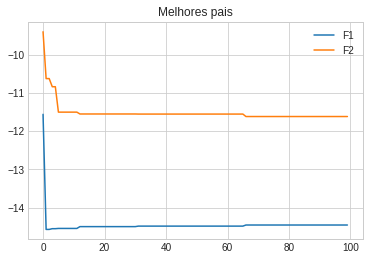

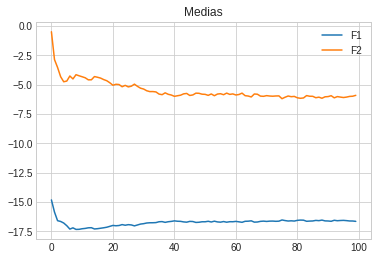

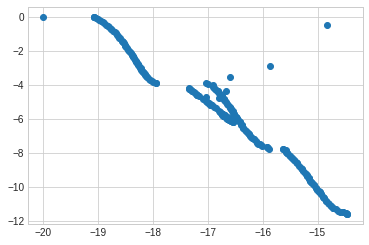

In [ ]:
def exec():
  filenames = []


  teste = 1
  gera =  100
  pop_t = 200
  pop = body(teste,gera,pop_t)


  #print(pop[4][len(pop[4])-1])
  pop[4][len(pop[4])-1] = sorted(pop[4][len(pop[4])-1], key=lambda x: x[1])
  #print(len(pop[4][len(pop[4])-1]),*pop[4][len(pop[4])-1],sep = '\n')
  #print(pop[1])
  #PLOT DO GRÁFICO APENAS
  x = []
  y = []
  #z = []


  func_gif_front(teste,pop[4])

  #plt.title("Fronteira 1")
  #plt.show()

  x = []
  y = []
  a = []
  b = []
  for i in pop[1]:
    x.append(i[1])
    y.append(i[2])

  plt.plot(range(len(pop[1])),x)
  plt.plot(range(len(pop[1])),y)
  plt.legend(["F1","F2"])
  #plt.xlim(0, 18)
  plt.title("Melhores pais")
  plt.show()
  x = []
  y = []

  for i in pop[2]:
    x.append(i)
  for i in pop[3]:
    y.append(i)

  plt.plot(range(len(pop[2])),x)
  plt.plot(range(len(pop[3])),y)
  plt.legend(["F1","F2"])
  #plt.xlim(0, 18)
  plt.title("Medias")
  plt.show()

  for i in pop[4][len(pop[4])-1]:
    if(i[3] == 0):
      x.append(i[1])
      y.append(i[2])
  
    #z.append(i[0][2])
  #plt.plot(x,y)

  plt.scatter(x,y)
  plt.show()
  #ax = plt.axes(projection='3d')

  # Data for a three-dimensional line
  #ax.plot3D(x, y, z, 'gray')
  #FIM

exec()